In [32]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Imports


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import jax

from scripts.extras import initialize_params, ANN, MSE
from scripts.first_order_optimizations import (
    gradient_descent,
    stochastic_gradient_descent,
    stochastic_gradient_descent_decay,
    stochastic_gradient_descent_momentum,
    adagrad,
    rmsprop,
)

# Data


In [34]:
def f(x):
    return np.sin(x) * np.exp(-0.1 * x) + 0.1 * np.cos(np.pi * x)
a, b = 0, 10

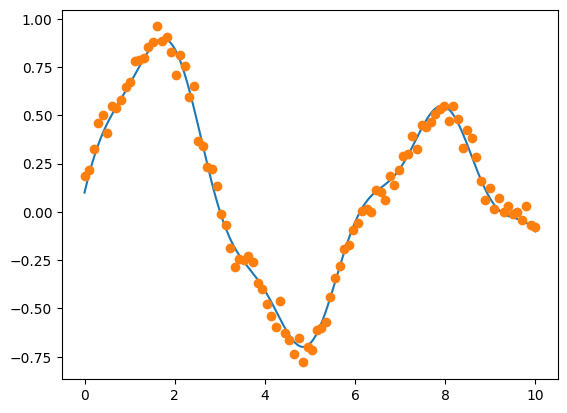

In [35]:
def get_training_data(n_points, noise):
    np.random.seed(0)  # for reproducibility
    x = np.linspace(a, b, n_points)[:, None]
    y = f(x) + noise * np.random.randn(n_points, 1)
    return x, y


x_fine = np.linspace(a, b, 1000)[:, None]
plt.plot(x_fine, f(x_fine))

n_points = 100
noise = 0.05
xx, yy = get_training_data(n_points=n_points, noise=noise)
plt.plot(xx, yy, "o")

# ANN


In [36]:
loss_func = MSE
init_params = initialize_params([1, 5, 5, 1])

loss_jit = jax.jit(loss_func)
grad_jit = jax.jit(jax.grad(loss_func, argnums=2))

print(f"initial loss: {loss_func(xx, yy, init_params)}")

initial loss: 0.2815801203250885


# Optimizations


In [37]:
params_gd, history_params_gd, history_loss_gd = gradient_descent(
    loss_jit=loss_jit, 
    grad_jit=grad_jit, 
    xx=xx, yy=yy, 
    init_params=init_params
)
print(history_loss_gd[0])
print(history_loss_gd[-1])

0.28158018
0.0055523436


In [38]:
params_sgd, history_params_sgd, history_loss_sgd = stochastic_gradient_descent(
    loss_jit=loss_jit,
    grad_jit=grad_jit,
    xx=xx,
    yy=yy,
    n_training_points=n_points,
    init_params=init_params,
)
print(history_loss_sgd[0])
print(history_loss_sgd[-1])

0.28158018
0.002647927


In [39]:
params_sgd_decay, history_params_sgd_decay, history_loss_sgd_decay = stochastic_gradient_descent_decay(
    loss_jit=loss_jit,
    grad_jit=grad_jit,
    xx=xx,
    yy=yy,
    n_training_points=n_points,
    init_params=init_params,
)
print(history_loss_sgd_decay[0])
print(history_loss_sgd_decay[-1])

0.28158018
0.005246158


In [40]:
params_sgd_momentum, history_params_sgd_momentum, history_loss_sgd_momentum = stochastic_gradient_descent_momentum(
    loss_jit=loss_jit,
    grad_jit=grad_jit,
    xx=xx,
    yy=yy,
    n_training_points=n_points,
    init_params=init_params,
)
print(history_loss_sgd_momentum[0])
print(history_loss_sgd_momentum[-1])

0.28158018
0.030698404


In [41]:
params_adagrad, history_params_adagrad, history_loss_adagrad = adagrad(
    loss_jit=loss_jit,
    grad_jit=grad_jit,
    xx=xx,
    yy=yy,
    n_training_points=n_points,
    init_params=init_params,
)
print(history_loss_adagrad[0])
print(history_loss_adagrad[-1])

0.28158018
0.0045846784


In [42]:
params_rmsprop, history_params_rmsprop, history_loss_rmsprop = rmsprop(
    loss_jit=loss_jit,
    grad_jit=grad_jit,
    xx=xx,
    yy=yy,
    n_training_points=n_points,
    init_params=init_params,
)
print(history_loss_rmsprop[0])
print(history_loss_rmsprop[-1])

0.28158018
0.0022706168


# Plot results

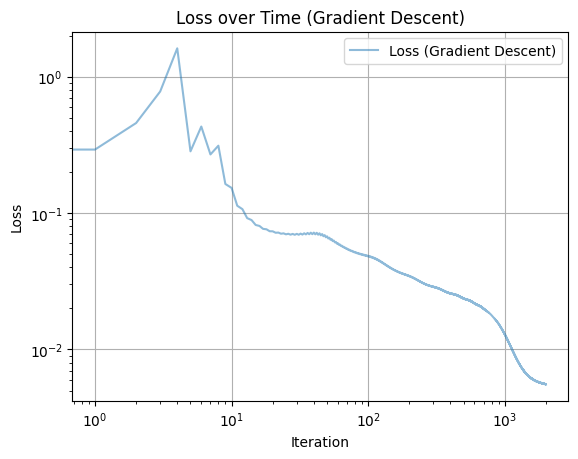

In [43]:
plt.loglog(history_loss_gd, label='Loss (Gradient Descent)', alpha=0.5)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Time (Gradient Descent)')
plt.legend()
plt.grid(True)
plt.show()

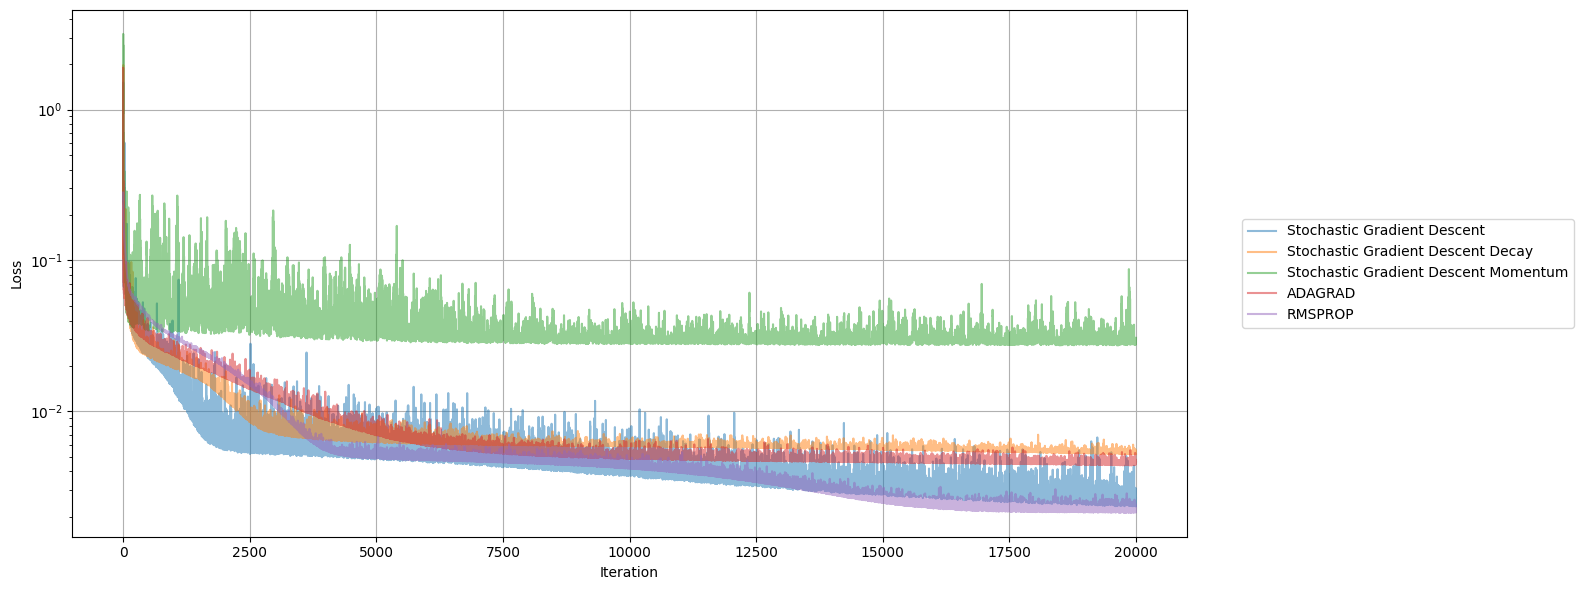

In [44]:
plt.figure(figsize=(16, 6))  # Make the figure square (width, height)

plt.semilogy(history_loss_sgd, label='Stochastic Gradient Descent', alpha=0.5)
plt.semilogy(history_loss_sgd_decay, label='Stochastic Gradient Descent Decay', alpha=0.5)
plt.semilogy(history_loss_sgd_momentum, label='Stochastic Gradient Descent Momentum', alpha=0.5)
plt.semilogy(history_loss_adagrad, label='ADAGRAD', alpha=0.5)
plt.semilogy(history_loss_rmsprop, label='RMSPROP', alpha=0.5)

plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()